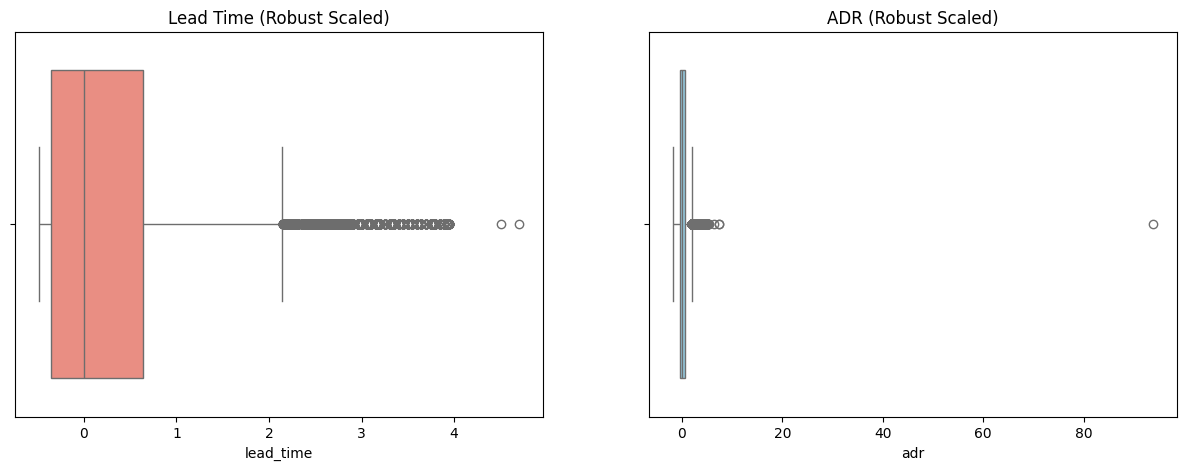

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_final = pd.read_csv('../data/engineered/train_final.csv')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=train_final, x='lead_time', ax=ax[0], color='salmon')
ax[0].set_title('Lead Time (Robust Scaled)')

sns.boxplot(data=train_final, x='adr', ax=ax[1], color='skyblue')
ax[1].set_title('ADR (Robust Scaled)')
plt.show()

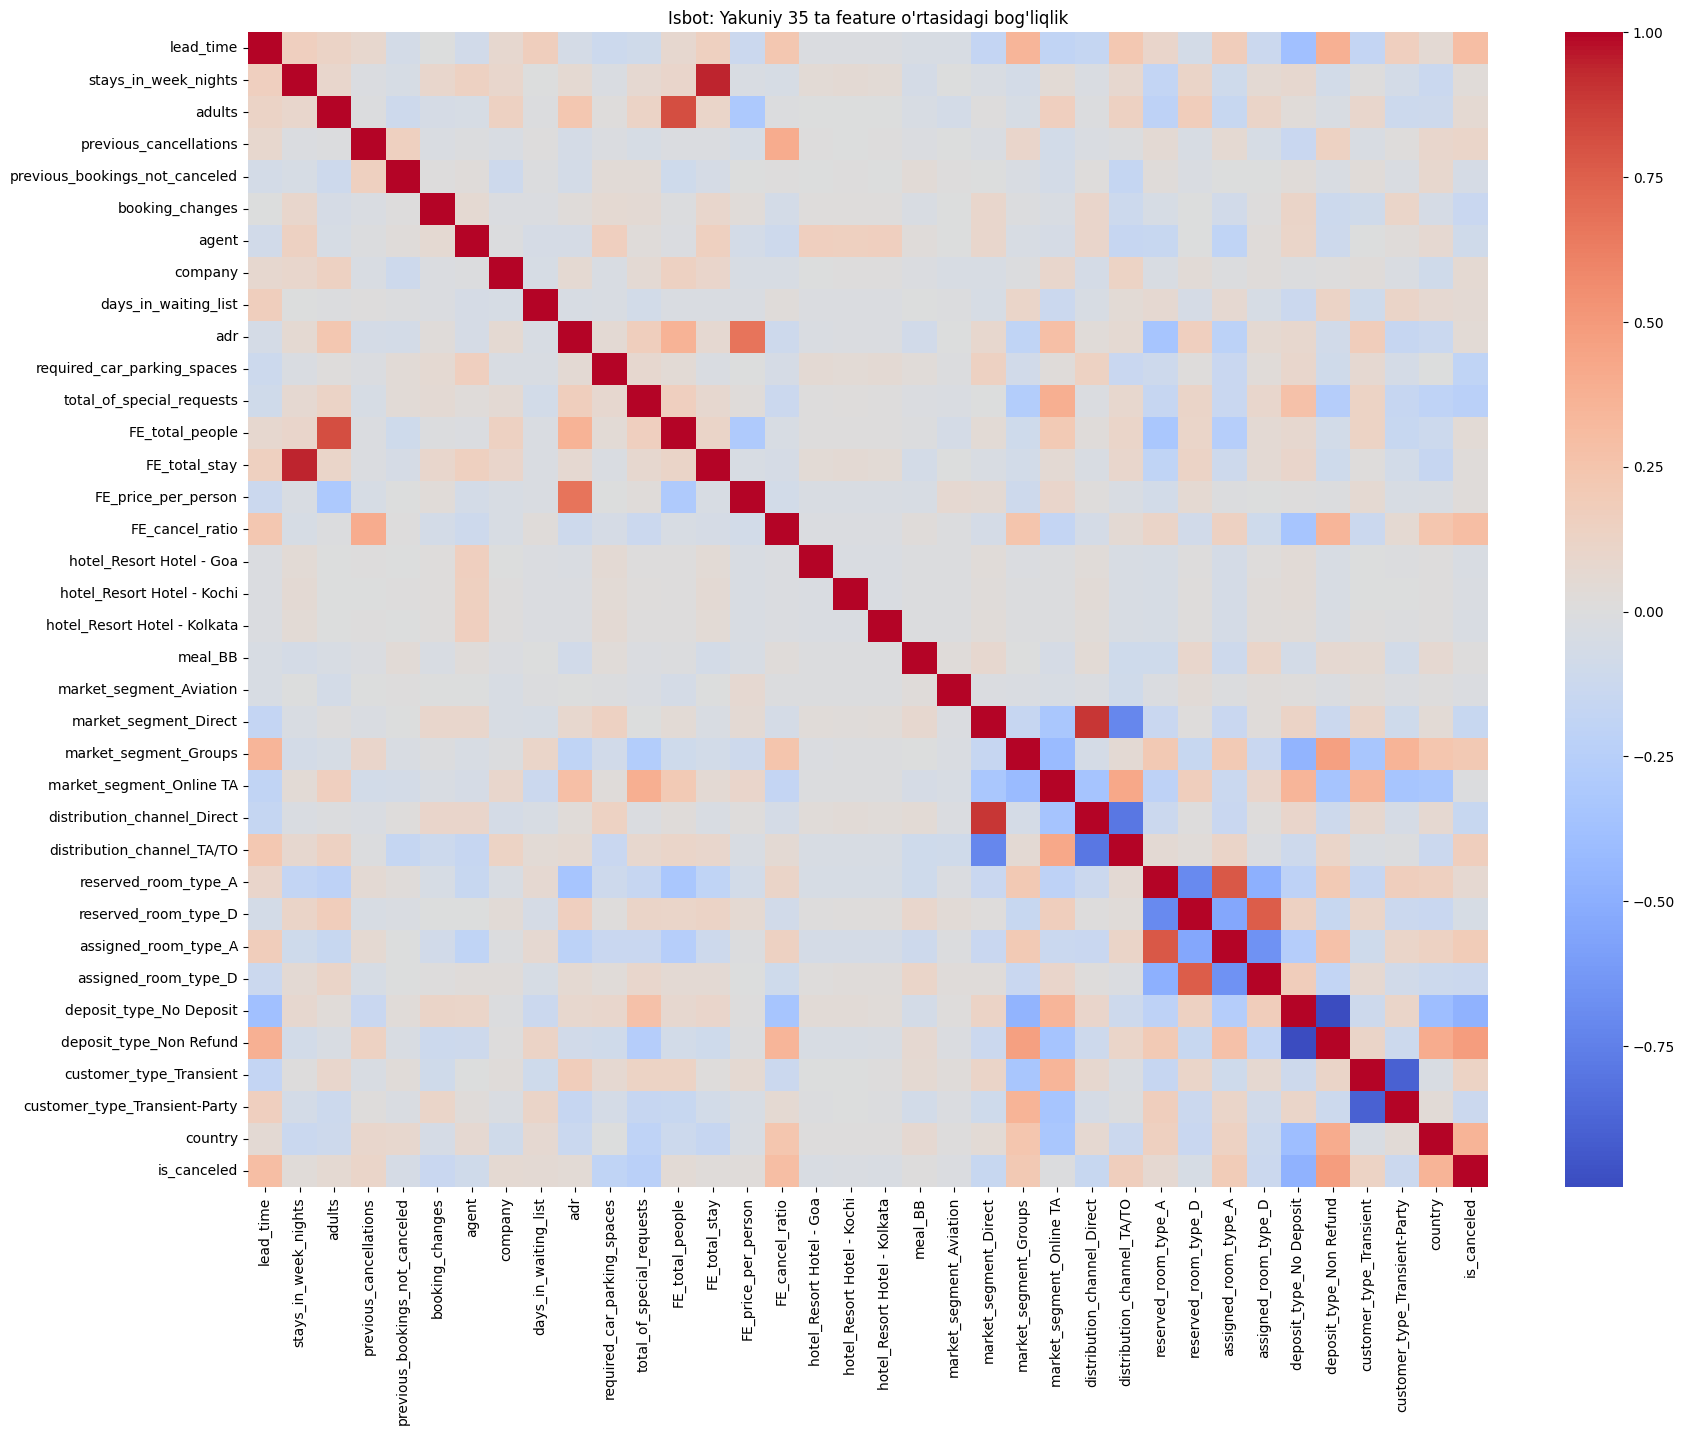

In [ ]:
plt.figure(figsize=(20, 15))
correlation = train_final.corr()

sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0)
plt.title("Isbot: Yakuniy 35 ta feature o'rtasidagi bog'liqlik")
plt.show()

c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.8.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator KNNImputer from version 1.8.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Robu

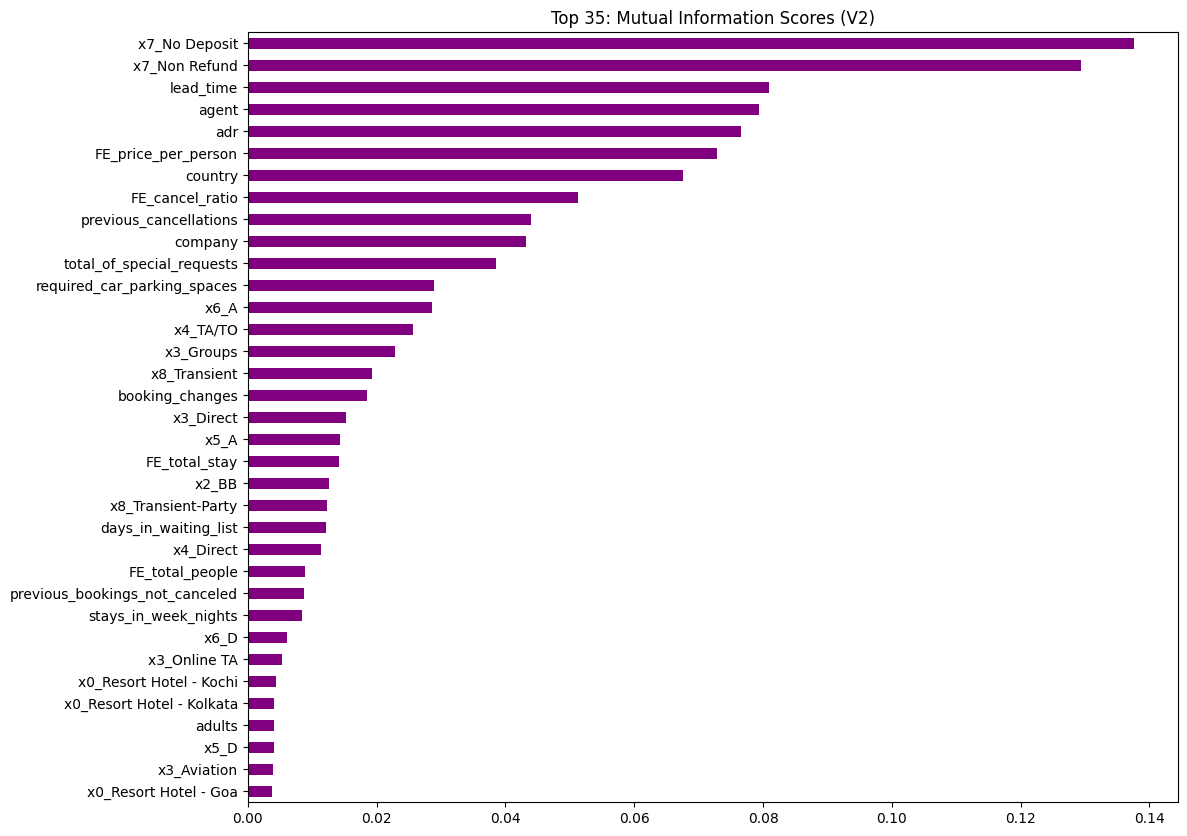

In [3]:
import joblib
selector = joblib.load('../data/engineered/feature_selector.pkl')
preprocessor = joblib.load('../data/engineered/preprocessor_full.pkl')

# Ustun nomlarini yig'ish (V2 tartibi bilan)
num_features = preprocessor.transformers_[0][2]
ohe_features = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
high_card = preprocessor.transformers_[2][2]
all_cols = num_features + ohe_features + high_card

mi_scores = pd.Series(selector.scores_, index=all_cols).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
mi_scores.head(35).plot(kind='barh', color='purple')
plt.title("Top 35: Mutual Information Scores (V2)")
plt.gca().invert_yaxis()
plt.show()

In [4]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Ma'lumotlarni o'qiymiz
df_eng = pd.read_csv('../data/engineered/engineered_data.csv')
train_final = pd.read_csv('../data/engineered/train_final.csv')

print(f"Engineeringdan keyingi ustunlar: {df_eng.shape[1]}")
print(f"Selectiondan keyingi (Yakuniy) ustunlar: {train_final.shape[1]}")

Engineeringdan keyingi ustunlar: 38
Selectiondan keyingi (Yakuniy) ustunlar: 36


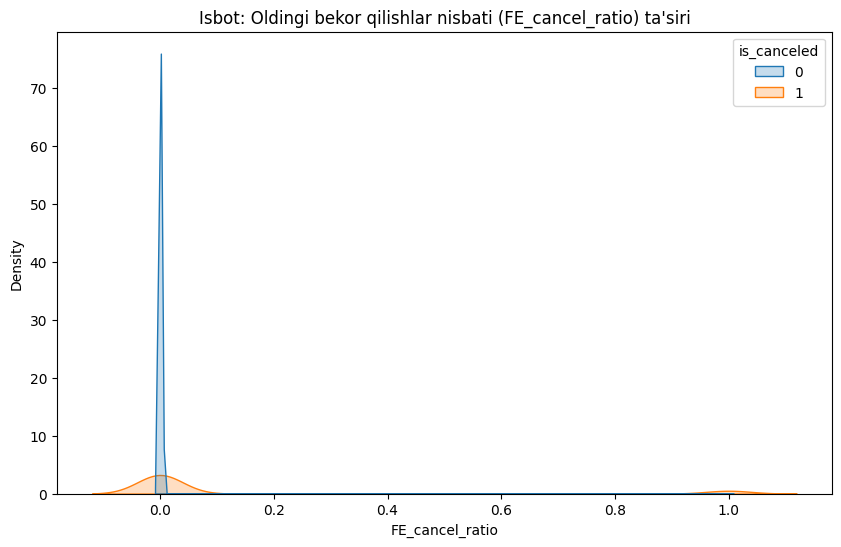

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_eng, x='FE_cancel_ratio', hue='is_canceled', fill=True)
plt.title("Isbot: Oldingi bekor qilishlar nisbati (FE_cancel_ratio) ta'siri")
plt.show()

c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.8.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator KNNImputer from version 1.8.0 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sharg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Robu

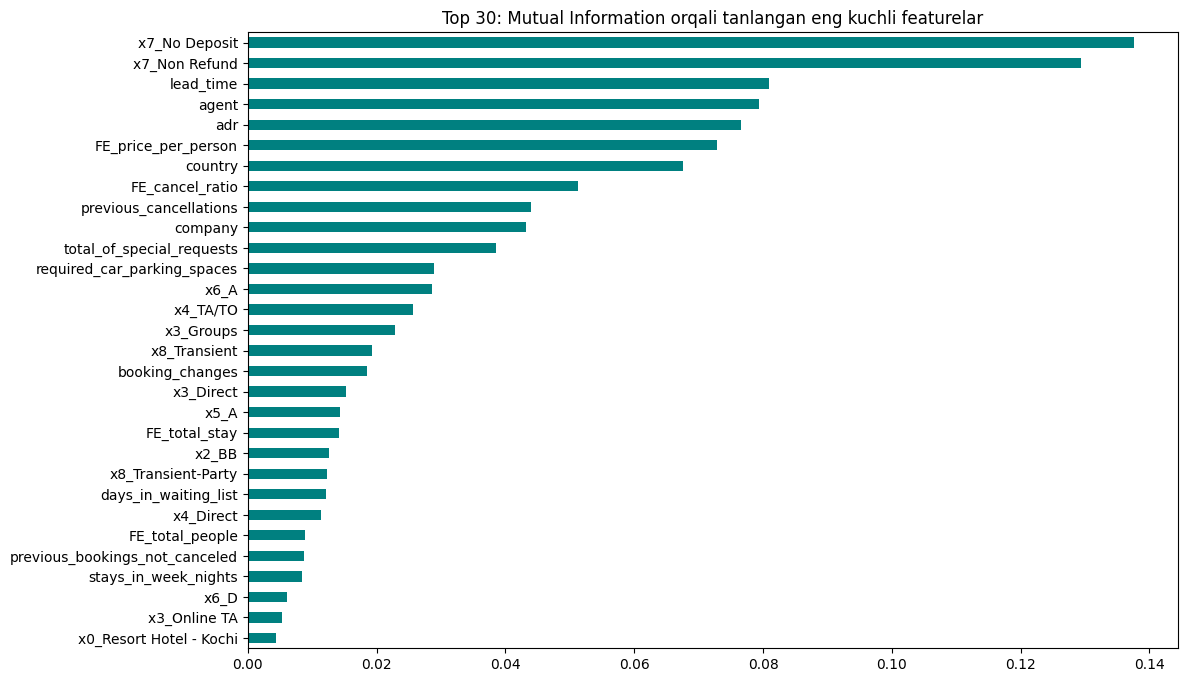

In [6]:
selector = joblib.load('../data/engineered/feature_selector.pkl')
preprocessor = joblib.load('../data/engineered/preprocessor_full.pkl')

# Barcha ustun nomlarini generatsiya qilish
# (Preprocessing bosqichidagi tartib bo'yicha)
num_features = preprocessor.transformers_[0][2]
ohe_features = list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())
high_card = preprocessor.transformers_[2][2]
all_cols = num_features + ohe_features + high_card

# MI Scores tahlili
mi_scores = pd.Series(selector.scores_, index=all_cols).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
mi_scores.head(30).plot(kind='barh', color='teal')
plt.title("Top 30: Mutual Information orqali tanlangan eng kuchli featurelar")
plt.gca().invert_yaxis()
plt.show()

In [7]:
forbidden_cols = ['reservation_status', 'arrival_date_year']
exists = [col for col in forbidden_cols if col in train_final.columns]

if not exists:
    print("✅ DLP ISBOTLANDI: Leakage xavfi bor ustunlar yakuniy ma'lumotda yo'q!")
else:
    print(f"❌ DIQQAT: {exists} ustunlari hali ham ma'lumotda turibdi!")

✅ DLP ISBOTLANDI: Leakage xavfi bor ustunlar yakuniy ma'lumotda yo'q!


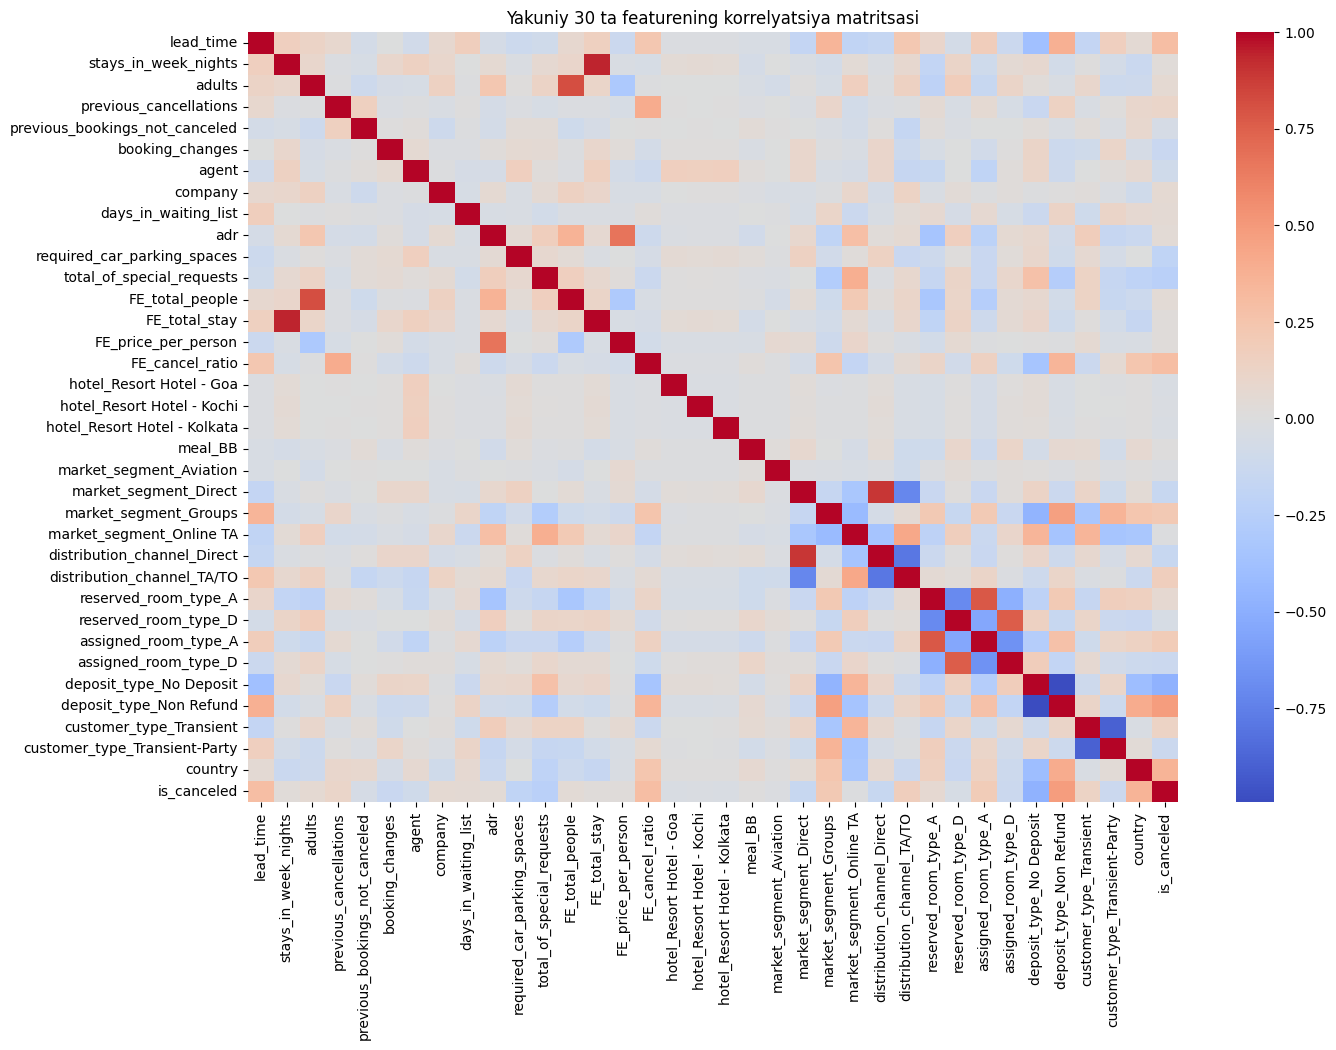

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_final.corr(), cmap='coolwarm', annot=False)
plt.title("Yakuniy 30 ta featurening korrelyatsiya matritsasi")
plt.show()

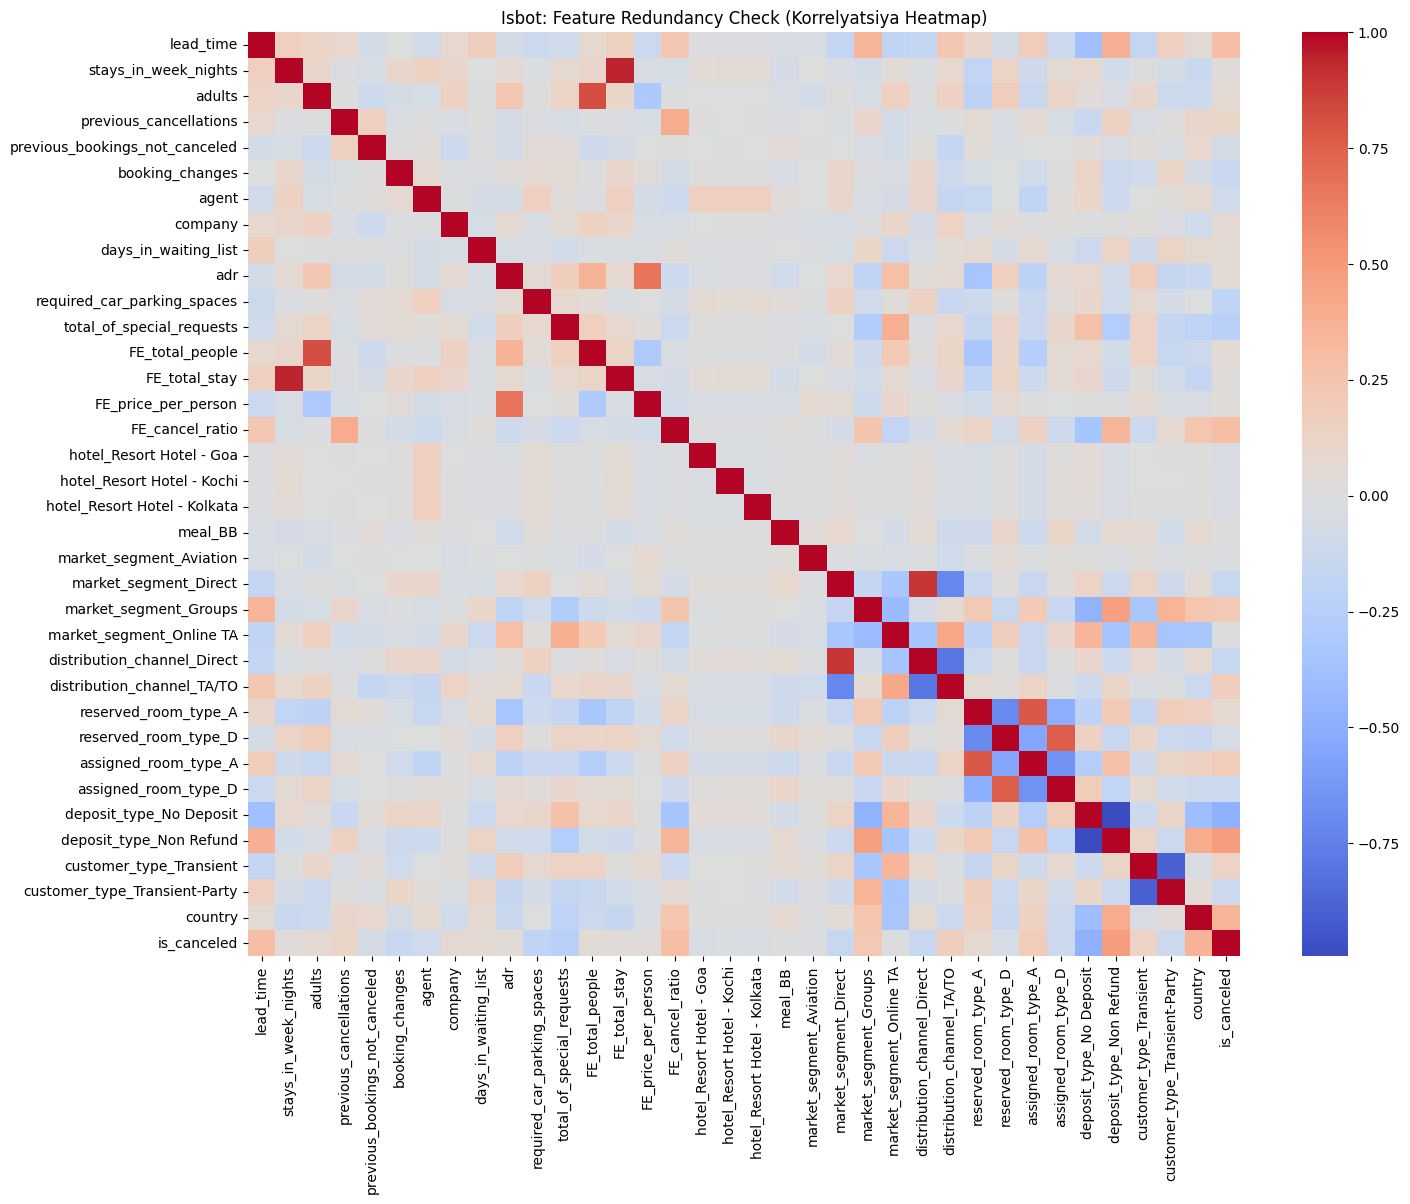

In [9]:
# Notebook uchun qo'shimcha tahlil
plt.figure(figsize=(16, 12))
correlation = train_final.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Isbot: Feature Redundancy Check (Korrelyatsiya Heatmap)")
plt.show()